In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dataset1 = pd.read_csv('/content/deep_exp1_dataset.csv')
X = dataset1[['Input']].values
y = dataset1[['Output']].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [ ]:
# Name: Tarun S
# Register Number: 212223040226
class NeuralNet(nn.Module):
  def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(1,4)
        self.fc2=nn.Linear(4,6)
        self.fc3=nn.Linear(6,1)
        self.relu= nn.ReLU()
        self.history ={'Loss':[]}

  def forward(self,x):
    x=self.relu(self.fc1(x))
    x=self.relu(self.fc2(x))
    x=self.fc3(x)
    return x





In [ ]:
# Initialize the Model, Loss Function, and Optimizer
ai_brain = NeuralNet()
criterion= nn.MSELoss()
optimizer= optim.RMSprop(ai_brain.parameters() ,lr=0.001)

In [ ]:
# Name:Tarun S
# Register Number:212223040226
def train_model(ai_brain, X_train, y_train, criterion, optimizer, epochs=3000):
    # Write your code here
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = ai_brain(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        ai_brain.history['Loss'].append(loss.item())
        if epoch % 200 == 0:
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')


In [ ]:
train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)

Epoch [0/3000], Loss: 4100.257324
Epoch [200/3000], Loss: 3730.464111
Epoch [400/3000], Loss: 3089.682373
Epoch [600/3000], Loss: 2235.856689
Epoch [800/3000], Loss: 1342.444580
Epoch [1000/3000], Loss: 661.633606
Epoch [1200/3000], Loss: 375.835480
Epoch [1400/3000], Loss: 311.670990
Epoch [1600/3000], Loss: 244.987900
Epoch [1800/3000], Loss: 173.376709
Epoch [2000/3000], Loss: 108.397514
Epoch [2200/3000], Loss: 56.264011
Epoch [2400/3000], Loss: 21.361670
Epoch [2600/3000], Loss: 6.186863
Epoch [2800/3000], Loss: 4.300690


In [ ]:
with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')


Test Loss: 2.205209


In [ ]:
loss_df = pd.DataFrame(ai_brain.history)

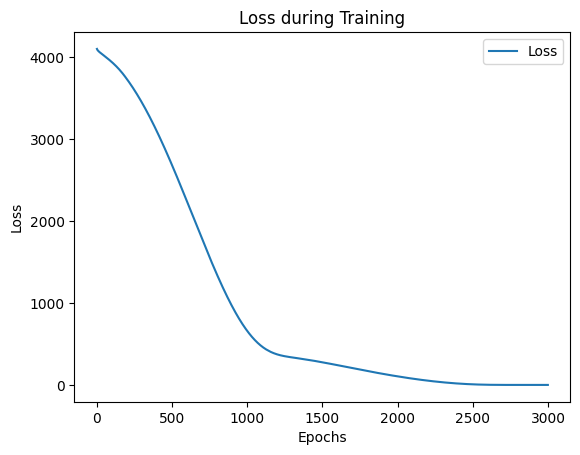

In [ ]:

import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()


In [ ]:
X_n1_1 = torch.tensor([[7]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 43.290401458740234
